<a href="https://colab.research.google.com/github/nayelhashmi2000/DeepLearning/blob/master/CvD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 5.2MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 1.0MB 10.6MB/s 
     |████████████████████████████████| 358kB 34.7MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 40kB 4.5MB/s 
     |████████████████████████████████| 40kB 4.6MB/s 
     |████████████████████████████████| 92kB 9.2MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 2.6MB 34.0MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *


In [3]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix

     |████████████████████████████████| 5.9MB 5.0MB/s 
     |████████████████████████████████| 184kB 46.0MB/s 
Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?


In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
fns=get_image_files("/content/drive/My Drive/datasets/cvd/")

In [6]:
Cvd = DataBlock(
blocks=(ImageBlock, CategoryBlock),
get_items=get_image_files,
splitter=RandomSplitter(valid_pct=0.2, seed=42),
get_y=parent_label)




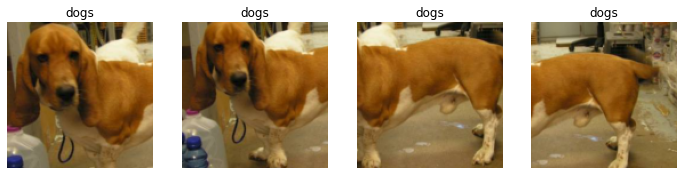

In [7]:
Cvd = Cvd.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = Cvd.dataloaders("/content/drive/My Drive/datasets/cvd/")
dls.train.show_batch(max_n=4, nrows=1, unique=True)

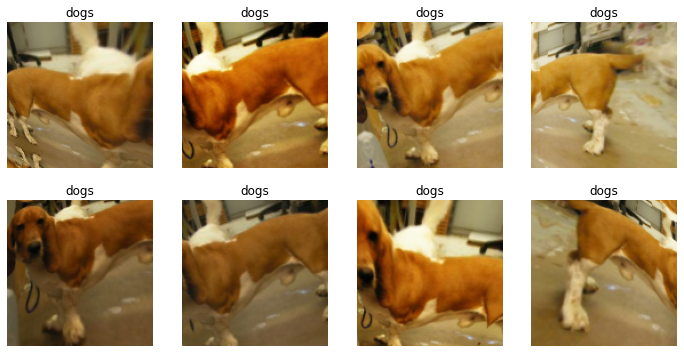

In [8]:
Cvd = Cvd.new(item_tfms=Resize(128),
batch_tfms=aug_transforms(mult=2))
dls = Cvd.dataloaders("/content/drive/My Drive/datasets/cvd/")
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [9]:
Cvd = Cvd.new(
item_tfms=RandomResizedCrop(224, min_scale=0.5),
batch_tfms=aug_transforms())
dls = Cvd.dataloaders("/content/drive/My Drive/datasets/cvd/")

In [10]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.765581,0.119615,0.025000,01:28


epoch,train_loss,valid_loss,error_rate,time
0,0.193082,0.032759,0.012500,01:28
1,0.164245,0.043823,0.025000,01:26
2,0.136787,0.026879,0.012500,01:26
3,0.107321,0.029122,0.012500,01:28


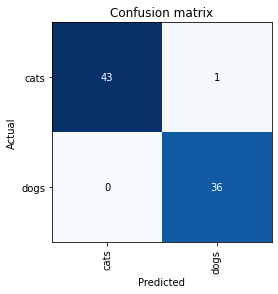

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

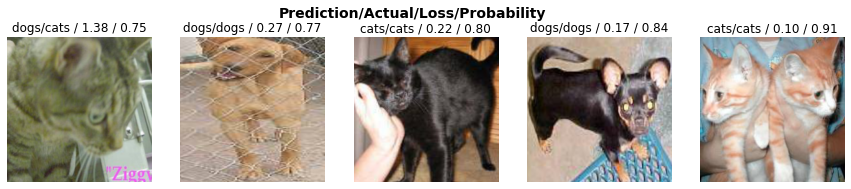

In [12]:
interp.plot_top_losses(5, nrows=1)

In [13]:
cleaner = ImageClassifierCleaner(learn)
cleaner

TypeError: ignored